In [ ]:
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report, average_precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 3. EfficientNetB0

# Fine-Tune EfficientNetB0

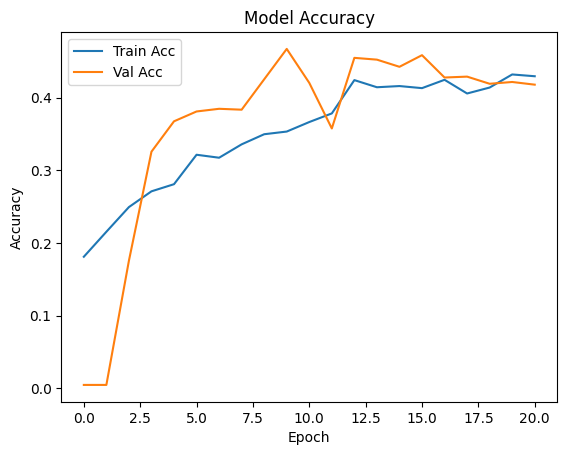

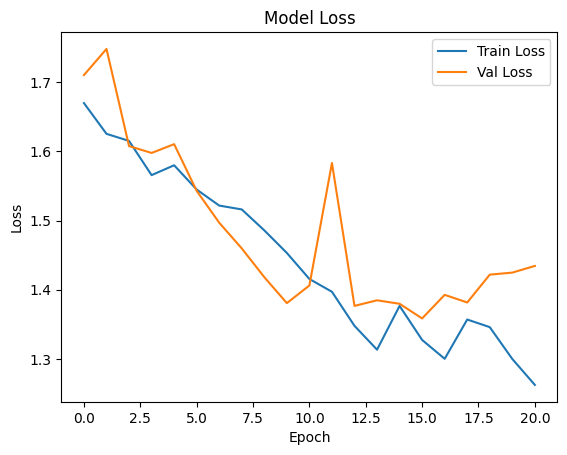

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step
              precision    recall  f1-score   support

         Bin       0.43      0.12      0.19       156
       Glass       0.49      1.00      0.65       204
       Metal       0.60      0.10      0.17       153
       Other       0.22      0.62      0.32         8
     Plastic       0.40      0.45      0.43        82

    accuracy                           0.46       603
   macro avg       0.43      0.46      0.35       603
weighted avg       0.49      0.46      0.38       603

mAP Score: 0.57


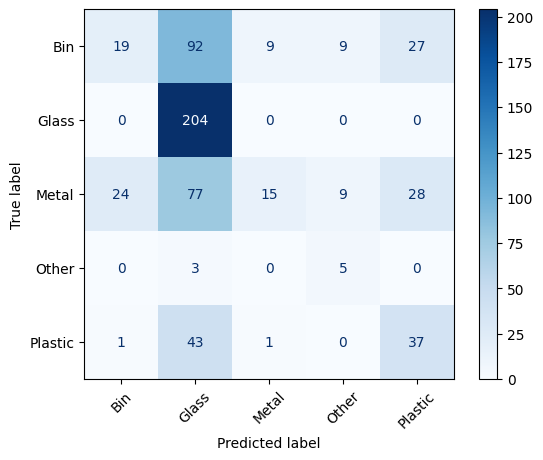

In [ ]:
#plot accuracy
plt.plot(fine_tune_history.history['accuracy'], label='Train Acc')
plt.plot(fine_tune_history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#plot loss
plt.plot(fine_tune_history.history['loss'], label='Train Loss')
plt.plot(fine_tune_history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

pred_probs = model_efficient.predict(test_gen)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_gen.classes

print(classification_report(y_true, y_pred, target_names=test_gen.class_indices.keys()))

# mAP calculate
map_score = average_precision_score(tf.keras.utils.to_categorical(y_true), pred_probs, average='macro')
print(f"mAP Score: {map_score:.2f}")

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen.class_indices)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()